In [18]:
!pip install mglearn

  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582645 sha256=e71d40dd1851b69dd66ae8e129a96e1468efc0a610854a43768d29ba97246358
  Stored in directory: c:\users\samsung\appdata\local\pip\cache\wheels\87\75\37\404e66d0c4bad150f101c9a0914b11a8eccc2681559936e7f7
Successfully built mglearn


In [1]:
from IPython.display import display
import numpy as np
import mglearn
import matplotlib.pyplot as plt
import pandas as pd

X.shape: (26, 2)


C:\Users\samsung\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
C:\Users\samsung\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52395 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\samsung\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\samsung\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51704 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\samsung\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\samsung\Anaconda3\lib\site-packages\matplotlib\backends\ba

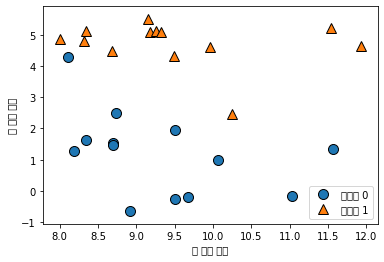

In [9]:
#forge데이터셋은 인위적으로 만든 이진 분류 데이터셋입니다.
X,y= mglearn.datasets.make_forge()
#산점도를 그립니다.
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(["클래스 0","클래스 1"],loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print("X.shape:",X.shape)

Text(0, 0.5, '타깃')

C:\Users\samsung\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\samsung\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\samsung\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\samsung\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44611 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\samsung\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\samsung\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49457 miss

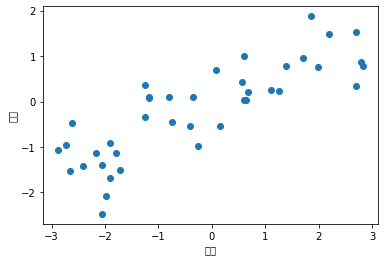

In [11]:
#희귀 알고리즘 설명에는 인위적으로 만든 wave 데이터셋을 사용하겠습니다. wave 데이터셋은 입력 특성 하나와 모델링할 타깃 변수(또는 응답)을 가집니다.
X,y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.xlabel("특성")
plt.ylabel("타깃")

# 1.문제정의
- 각 종양은 양성과 악성으로 레이블되어있고
- 조직 데이터를 기반으로 종양이 악성인지를 예측할 수 있도록 학습하는 것이 과제

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n",cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
#이 데이터셋은 569개의 데이터 포인트를 가지고 있고 특성은 30개입니다.
print("유방암 데이터의 형태:",cancer.data.shape)

유방암 데이터의 형태: (569, 30)


In [8]:
#569개 데이터 포인트 중 212개는 악성이고 357개는 양성입니다.
# zip():내장함수로 같은 길이의 리스트를 같은 인덱스끼리 잘라서 리스트로 반환을 해주는 역할을 한다.
# bincount는 빈도수를 카운트하는데 사용되는 메소드.0부터 가장 큰 값까지 각각의 발생 빈도수 체크
print("클래스별 샘플 개수:\n",{n: v for n, v in zip(cancer.target_names,np.bincount(cancer.target))})

클래스별 샘플 개수:
 {'malignant': 212, 'benign': 357}


In [12]:
#feature_names속성을 확인하면 각 특성의의미를 알 수 있습니다.
print("특성 이름:\n", cancer.feature_names)

특성 이름:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [16]:
cancer.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.  For inst

In [3]:
#보스턴 주택가격 데이터셋
#범죄율,찰스강인접도,고속도로 접근성등의 정보를 이용해 1970년대 보스턴 주변의
#주택 평균 가격을 예측하는 것입니다. 이 데이터셋에는 데이터 포인트 506개와 특성 13개가 있습니다.
from sklearn.datasets import load_boston
boston = load_boston()
print("데이터의 형태:",boston.data.shape)

데이터의 형태: (506, 13)


###2.3.2 k-최근접 이웃

C:\Users\samsung\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


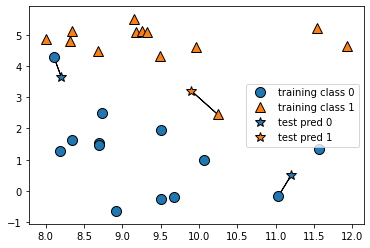

In [3]:
mglearn.plots.plot_knn_classification(n_neighbors=1)
#forge데이터셋에 대한 1-최근접 이웃 모델의 예측

C:\Users\samsung\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


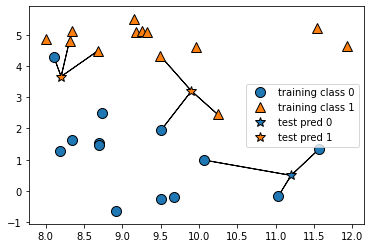

In [4]:
mglearn.plots.plot_knn_classification(n_neighbors=3)
#forge 데이터셋에 대한 3-최근접 이웃 모델의 예측

In [ ]:
#예측은 연결된 데이터 포인트의 색으로 나타납니다. 새 데이터 포인트 중 왼쪽의 것은 이웃을 하나만
#사용했을 때와 예측이 달라진 것을 알 수 있습니다.
#이 그림은 이진 분류 문제지만 클래스가 다수인 데이터셋에도 같은 방법을 적용할 수 있습니다.
#클래스가 여러 개일 때도 각 클래스에 속한 이웃이 몇 개인지를 헤아려 가장 많은 클래스를
#예측값으로 사용합니다.

In [ ]:
#scikit-learn을 사용해서 k-최근접 이웃 알고리즘을 어떻게 적용하는지 살펴보겠습니다.
#일반화 성능을 평가할 수 있도록 데이터를 훈련 세트와 테스트 세트로 나눕니다.

In [4]:
from sklearn.model_selection import train_test_split
X,y=mglearn.datasets.make_forge()

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

C:\Users\samsung\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [5]:
#KNeighborsClassifier를 임포트하고 객체를 만듭니다. 이때 이웃의 수 같은 매개변수들을 
#지정합니다. 여기서는 이웃의 수를 3으로 지정합니다.
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=3)

In [7]:
#이제 훈련 세트를 사용하여 분류 모델을 학습시킵니다. KNeighborsClassifier에서의 학습은
#예측할 때 이웃을 찾을 수 있도록 데이터를 저장하는 것입니다.
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [8]:
#테스트 데이터에 대해 predict메서드를 호출해서 예측합니다. 테스트 세트의 각 데이터 포인트에 대해 훈련 세트에서 가장 가까운 이웃을 계산한 다음 가장 많은 클래스를 찾습니다.
print("테스트 세트 예측:",clf.predict(X_test))

테스트 세트 예측: [1 0 1 0 1 0 0]


In [9]:
#모델이 얼마나 잘 일반화되었는지 평가하기 위해 score메서드에 테스트 데이터와 테스트레이블을 넣어 호출합니다.
print("테스트 세트 정확도:{:.2f}".format(clf.score(X_test,y_test)))

테스트 세트 정확도:0.86


In [ ]:
###KNeighborsClassifier분석

C:\Users\samsung\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\samsung\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\samsung\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\samsung\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


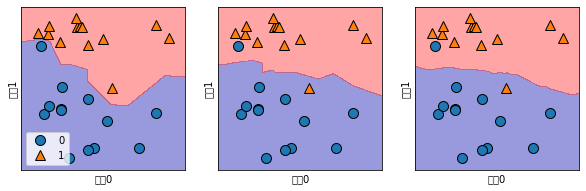

In [13]:
fig, axes = plt.subplots(1,3,figsize=(10,3))
for n_neighbors, ax in zip([1,3,9],axes):
    #fit메소드는 self오브젝트를 리턴합니다.
    #그래서 객체 생성과 fit메소드를 한 줄에 쓸 수 있습니다. 
    clf=KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=True,eps=0.5,ax=ax,alpha=.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_xlabel("특성0")
    ax.set_ylabel("특성1")
axes[0].legend(loc=3)


In [ ]:
# 왼쪽 그림을 보면 이웃을 하나 선택했을 때는 결정 경계가 훈련 데이터에 가깝게 따라가고 있습니다. 이웃의 수를 늘릴수록 결정경계는 더 부드러워집니다. 부드러운 경꼐는 
# 더 단순한 모델을 의미합니다. 다시 말해 이웃을 적게 사용하면 모델의 복잡도가 높아지고 많이 사용하면 복잡도는 낮아집니다.

In [ ]:
# 모델의 복잡도와 일반화 사이의 관꼐를 입증할 수 있는지 살펴보겠습니다. 이를 위해
#실제 데이터인 유방암데이터셋을 사용하겠습니다.
#먼저 훈련세트와 테스트세트로 나눕니다. 그런 다음 이웃의 수를 달리 하여 훈련 세트와
#테스트 세트의 성능을 평가합니다. 

C:\Users\samsung\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\samsung\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\samsung\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\samsung\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\samsung\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\samsung\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53580 mi

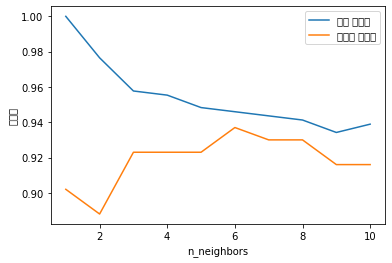

In [6]:
from sklearn.datasets import load_breast_cancer

cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(
    cancer.data,cancer.target,stratify=cancer.target,random_state=66)

training_accuracy=[]
test_accuracy=[]
#1에서 10까지 n_neighbors를 적용
neighbors_settings = range(1,11)
for n_neighbors in neighbors_settings:
    #모델 생성
    clf=KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    #훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train,y_train))
    #일반화 정확도 저장
    test_accuracy.append(clf.score(X_test,y_test))
    
plt.plot(neighbors_settings,training_accuracy,label="훈련 정확도")
plt.plot(neighbors_settings,test_accuracy,label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

In [ ]:
최근접 이웃의 수가 하나일 때는 훈련데이터에 대한 예측이 완벽합니다. 하지만 이웃의 수가
늘어나면 모델은 단순해지고 훈련데이터의 정확도는 줄어듭니다. 이웃 하나 
사용한 테스트 세트의 정확도는 이웃을 많이 사용했을 때보다 낮습니다. 
이것은 1-최근접 이웃이 모델을 너무 복잡하게 만든다는 것을 설명해줍니다. 
반대로 이웃을 10개 사용했을때는 모델이 너무 단순해서 정확도는 더 나빠집니다. 
정확도가 가장 좋을 때는 중간 정도인 여섯 개를 사용한 경우입니다. 

### k-최근접 이웃 회귀

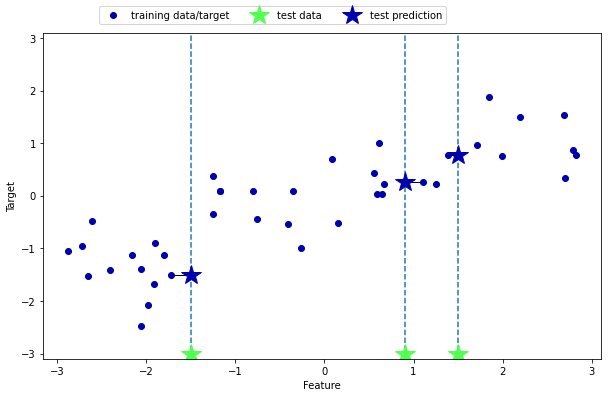

In [7]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

In [ ]:
#x축에 세 개의 테스트 데이터를 흐린 별 모양으로 표시했습니다. 
#최근접 이웃을 한 개만 이용할 때 예측은 그냥 가장 가까운 이웃의 타깃 값입니다.